In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
df = pd.read_csv('data/diabetes.csv')
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)

In [3]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
split_ratios = [0.1, 0.2, 0.3, 0.4, 0.5]
k_best = 19
results = []

In [ ]:
for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=ratio, random_state=42, stratify=y
    )

    smote = SMOTE(random_state=42)
    X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

    knn = KNeighborsClassifier(n_neighbors=k_best)
    knn.fit(X_train_sm, y_train_sm)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1 = report['1']['f1-score']

    results.append({
        'Split (Test Size)': ratio,
        'Accuracy': acc,
        'Precision (Positif)': precision,
        'Recall (Positif)': recall,
        'F1-Score (Positif)': f1
    })

In [ ]:
results_df = pd.DataFrame(results)
print("\nHasil Perbandingan Split Rasio:\n")
print(results_df.sort_values(by='Accuracy', ascending=False).to_string(index=False))


Hasil Perbandingan Split Rasio:

 Split (Test Size)  Accuracy  Precision (Positif)  Recall (Positif)  F1-Score (Positif)
               0.3  0.770563             0.640000          0.790123            0.707182
               0.4  0.759740             0.617021          0.813084            0.701613
               0.5  0.750000             0.604396          0.820896            0.696203
               0.1  0.740260             0.589744          0.851852            0.696970
               0.2  0.714286             0.565789          0.796296            0.661538


In [ ]:
results_df['Split Rasio'] = results_df['Split (Test Size)'].apply(lambda x: f"{int((1-x)*100)}:{int(x*100)}")

In [ ]:
results_df = results_df[['Split Rasio', 'Accuracy', 'Precision (Positif)', 'Recall (Positif)', 'F1-Score (Positif)']]

In [ ]:
df_melt = results_df.melt(id_vars='Split Rasio', var_name='Metric', value_name='Value')

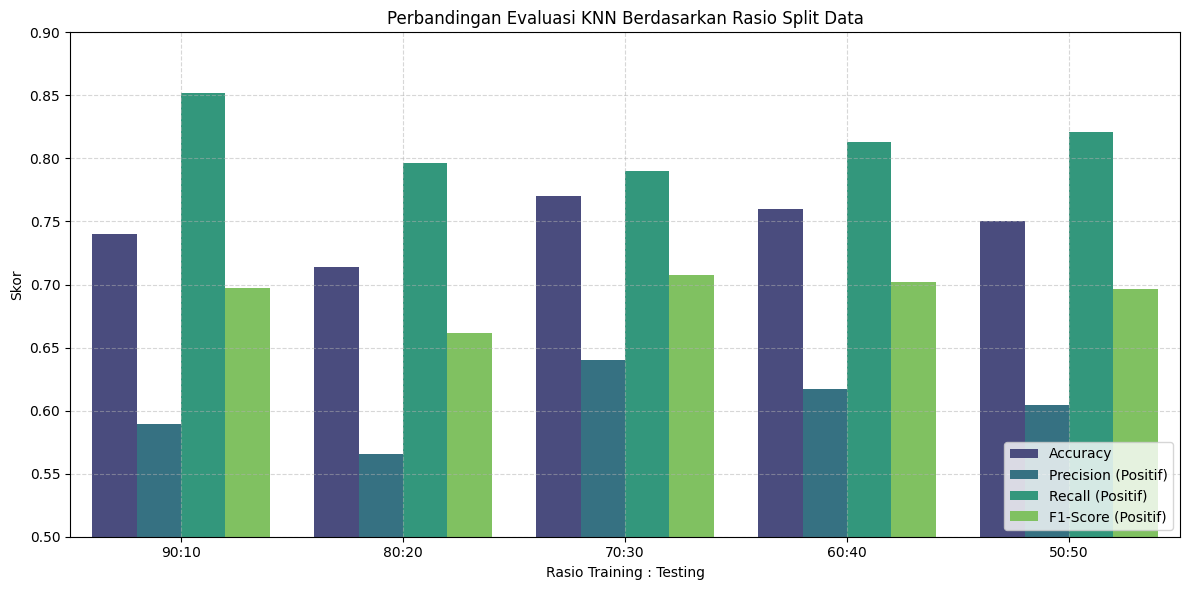

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt, x='Split Rasio', y='Value', hue='Metric', palette='viridis')
plt.title('Perbandingan Evaluasi KNN Berdasarkan Rasio Split Data')
plt.ylabel('Skor')
plt.xlabel('Rasio Training : Testing')
plt.ylim(0.5, 0.9)
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()